# Research Topic : Predict Solar Power Generation
# Author : Sanjoy Biswas
# Institute : Sylhet Engineering College

## Import Necessary Library

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import re
import pickle

## Import Dataset

In [3]:
plant1_GenData = pd.read_csv('Plant_1_Generation_Data.csv')

In [4]:
plant2_GenData = pd.read_csv('Plant_2_Generation_Data.csv')

In [5]:
plant1_WeatherSensorData = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

In [6]:
plant2_WeatherSensorData = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

In [7]:
plant1_GenData.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [8]:
plant1_WeatherSensorData.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


## Explotrary Data Analysis - EDA

In [9]:
import matplotlib.pyplot as plt

In [10]:
plant1_GenData.groupby('DATE_TIME')['DATE_TIME'].count()

DATE_TIME
01-06-2020 00:00    22
01-06-2020 00:15    22
01-06-2020 00:30    22
01-06-2020 00:45    22
01-06-2020 01:00    22
                    ..
31-05-2020 22:45    22
31-05-2020 23:00    22
31-05-2020 23:15    22
31-05-2020 23:30    22
31-05-2020 23:45    22
Name: DATE_TIME, Length: 3158, dtype: int64

In [11]:
plant1_WeatherSensorData.groupby('DATE_TIME')['DATE_TIME'].count()

DATE_TIME
2020-05-15 00:00:00    1
2020-05-15 00:15:00    1
2020-05-15 00:30:00    1
2020-05-15 00:45:00    1
2020-05-15 01:00:00    1
                      ..
2020-06-17 22:45:00    1
2020-06-17 23:00:00    1
2020-06-17 23:15:00    1
2020-06-17 23:30:00    1
2020-06-17 23:45:00    1
Name: DATE_TIME, Length: 3182, dtype: int64

In [12]:
dates = []
for date in plant1_GenData['DATE_TIME']:
    new_date = "2020-"
    new_date += date[3:6]
    new_date += date[0:2]
    new_date += date[10:]
    new_date += ":00"
    dates.append(new_date)

In [13]:
plant1_GenData['DATE_TIME'] = dates

In [14]:
plant1_GenData.groupby('DATE_TIME')['DATE_TIME'].count()

DATE_TIME
2020-05-15 00:00:00    21
2020-05-15 00:15:00    21
2020-05-15 00:30:00    21
2020-05-15 00:45:00    21
2020-05-15 01:00:00    22
                       ..
2020-06-17 22:45:00    22
2020-06-17 23:00:00    22
2020-06-17 23:15:00    22
2020-06-17 23:30:00    22
2020-06-17 23:45:00    22
Name: DATE_TIME, Length: 3158, dtype: int64

## Finding out which data points are missing from plant 1's Generator Data

In [16]:
missing = [date for date in list(plant1_WeatherSensorData['DATE_TIME']) if date not in list(plant1_GenData['DATE_TIME'])]

In [17]:
print(missing)

['2020-05-20 23:00:00', '2020-05-20 23:15:00', '2020-05-20 23:30:00', '2020-05-20 23:45:00', '2020-05-21 00:00:00', '2020-05-21 00:15:00', '2020-05-21 00:30:00', '2020-05-23 05:15:00', '2020-05-25 05:45:00', '2020-05-28 22:30:00', '2020-05-28 22:45:00', '2020-05-28 23:00:00', '2020-05-28 23:15:00', '2020-05-28 23:30:00', '2020-05-28 23:45:00', '2020-05-29 00:00:00', '2020-05-29 00:15:00', '2020-05-29 00:30:00', '2020-05-29 00:45:00', '2020-05-29 01:00:00', '2020-05-29 01:15:00', '2020-05-29 01:30:00', '2020-05-29 01:45:00', '2020-06-17 06:15:00', '2020-06-17 06:30:00']


In [18]:
columns = ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']

In [19]:
means = []
for column in columns:
    means.append(plant1_GenData[column].mean())

In [20]:
print(means)

[3147.4262112269266, 307.8027522655165, 3295.968737182587, 6978711.76067105]


In [21]:
for date in missing:
    plant1_GenData = plant1_GenData.append({'DATE_TIME':date, 'PLANT_ID':'4135001', 'SOURCE_KEY':'1BY6WEcLGh8j5v7', 'DC_POWER':means[0], 'AC_POWER':means[1], 'DAILY_YIELD':means[2], 'TOTAL_YIELD':means[3]},ignore_index=True)

In [22]:
print([date for date in list(plant1_GenData['DATE_TIME']) if date not in list(plant1_WeatherSensorData['DATE_TIME'])])

['2020-06-03 14:00:00', '2020-06-03 14:00:00', '2020-06-03 14:00:00', '2020-06-03 14:00:00']


In [23]:
columnsWSD = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']

In [24]:
meansWSD = []
for column in columnsWSD:
    meansWSD.append(plant1_WeatherSensorData[column].mean())

In [25]:
print(meansWSD)

[25.531605717564393, 31.091015378426455, 0.22831283006565095]


In [26]:
plant1_WeatherSensorData = plant1_WeatherSensorData.append({'DATE_TIME':'2020-06-03 14:00:00', 'PLANT_ID':'4135001', 'SOURCE_KEY':'HmiyD2TTLFNqkNe', columnsWSD[0]:meansWSD[0], columnsWSD[1]:meansWSD[1], columnsWSD[2]:meansWSD[2]},ignore_index=True)

In [27]:
plant1 = plant1_WeatherSensorData.copy()

In [28]:
combining = {'DC_POWER':[], 'AC_POWER':[], 'DAILY_YIELD':[], 'TOTAL_YIELD':[]}

In [29]:
dcPower = {}
acPower = {}
dailyYield = {}
totalYield = {}

for i in range(len(plant1_GenData['DATE_TIME'])):
    entry = plant1_GenData.iloc[i]
    date = entry['DATE_TIME']
    if date in dcPower:
        dcPower[date]['total'] += entry['DC_POWER']
        dcPower[date]['num'] += 1
        acPower[date]['total'] += entry['AC_POWER']
        acPower[date]['num'] += 1
        dailyYield[date]['total'] += entry['DAILY_YIELD']
        dailyYield[date]['num'] += 1
        totalYield[date]['total'] += entry['TOTAL_YIELD']
        totalYield[date]['num'] += 1
    else:
        dcPower[date] = {'total':entry['DC_POWER'], 'num':1}
        acPower[date] = {'total':entry['AC_POWER'], 'num':1}
        dailyYield[date] = {'total':entry['DAILY_YIELD'], 'num':1}
        totalYield[date] = {'total':entry['TOTAL_YIELD'], 'num':1}

In [30]:
for key in dcPower.keys():
    dcPower[key]['mean'] = dcPower[key]['total']/dcPower[key]['num']

In [31]:
for key in acPower.keys():
    acPower[key]['mean'] = acPower[key]['total']/acPower[key]['num']

In [32]:
for key in dailyYield.keys():
    dailyYield[key]['mean'] = dailyYield[key]['total']/dailyYield[key]['num']

In [33]:
for key in totalYield.keys():
    totalYield[key]['mean'] = totalYield[key]['total']/totalYield[key]['num']

In [34]:
for i in range(len(plant1['DATE_TIME'])):
    entry = plant1.iloc[i]
    date = entry['DATE_TIME']
    combining['DC_POWER'].append(dcPower[date]['mean'])
    combining['AC_POWER'].append(acPower[date]['mean'])
    combining['DAILY_YIELD'].append(dailyYield[date]['mean'])
    combining['TOTAL_YIELD'].append(totalYield[date]['mean'])

In [35]:
for key in combining.keys():
    plant1[key] = combining[key]

In [36]:
plant1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0.0,0.0,0.0,6.837223e+06
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,0.0,0.0,0.0,6.837223e+06
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,0.0,0.0,0.0,6.837223e+06
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,0.0,0.0,0.0,6.837223e+06
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0,0.0,0.0,0.0,6.852802e+06


## Data Point Analysis Using Visualization

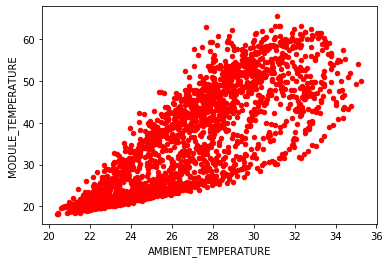

In [37]:
plant1.plot(kind='scatter',x='AMBIENT_TEMPERATURE',y='MODULE_TEMPERATURE',color='red')

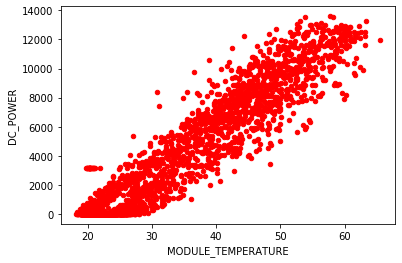

In [38]:
plant1.plot(kind='scatter',x='MODULE_TEMPERATURE',y='DC_POWER',color='red')

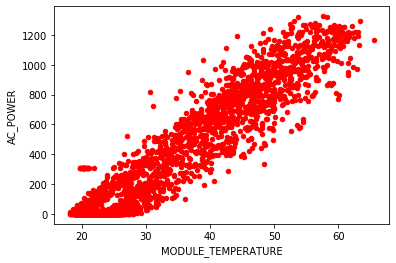

In [39]:
plant1.plot(kind='scatter',x='MODULE_TEMPERATURE',y='AC_POWER',color='red')

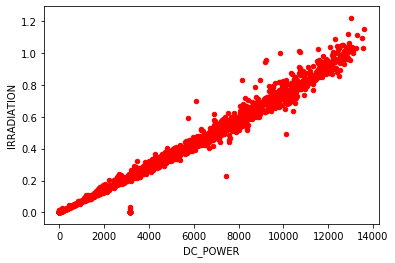

In [40]:
plant1.plot(kind='scatter',x='DC_POWER',y='IRRADIATION',color='red')

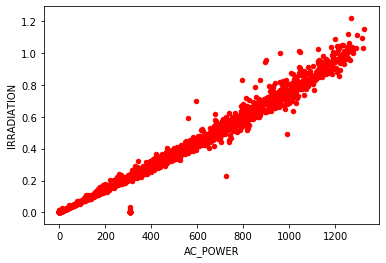

In [41]:
plant1.plot(kind='scatter',x='AC_POWER',y='IRRADIATION',color='red')

In [42]:
### Let us now process Plant 2's data in a similar fashion

In [43]:
plant2 = plant2_WeatherSensorData.copy()

In [44]:
dcPower2 = {}
acPower2 = {}
dailyYield2 = {}
totalYield2 = {}

for i in range(len(plant2_GenData['DATE_TIME'])):
    entry = plant2_GenData.iloc[i]
    date = entry['DATE_TIME']
    if date in dcPower2:
        dcPower2[date]['total'] += entry['DC_POWER']
        dcPower2[date]['num'] += 1
        acPower2[date]['total'] += entry['AC_POWER']
        acPower2[date]['num'] += 1
        dailyYield2[date]['total'] += entry['DAILY_YIELD']
        dailyYield2[date]['num'] += 1
        totalYield2[date]['total'] += entry['TOTAL_YIELD']
        totalYield2[date]['num'] += 1
    else:
        dcPower2[date] = {'total':entry['DC_POWER'], 'num':1}
        acPower2[date] = {'total':entry['AC_POWER'], 'num':1}
        dailyYield2[date] = {'total':entry['DAILY_YIELD'], 'num':1}
        totalYield2[date] = {'total':entry['TOTAL_YIELD'], 'num':1}

In [45]:
for key in dcPower2.keys():
    dcPower2[key]['mean'] = dcPower2[key]['total']/dcPower2[key]['num']

In [46]:
for key in acPower2.keys():
    acPower2[key]['mean'] = acPower2[key]['total']/acPower2[key]['num']

In [47]:
for key in dailyYield2.keys():
    dailyYield2[key]['mean'] = dailyYield2[key]['total']/dailyYield2[key]['num']

In [48]:
for key in totalYield2.keys():
    totalYield2[key]['mean'] = totalYield2[key]['total']/totalYield2[key]['num']

In [49]:
combining2 = {'DC_POWER':[], 'AC_POWER':[], 'DAILY_YIELD':[], 'TOTAL_YIELD':[]}

In [50]:
for i in range(len(plant2['DATE_TIME'])):
    entry = plant2.iloc[i]
    date = entry['DATE_TIME']
    combining2['DC_POWER'].append(dcPower2[date]['mean'])
    combining2['AC_POWER'].append(acPower2[date]['mean'])
    combining2['DAILY_YIELD'].append(dailyYield2[date]['mean'])
    combining2['TOTAL_YIELD'].append(totalYield2[date]['mean'])

In [51]:
for key in combining2.keys():
    plant2[key] = combining2[key]

In [52]:
plant2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,0.0,0.0,2222.724459,6.449816e+08
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0,0.0,0.0,1290.954545,6.449816e+08
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0,0.0,0.0,1290.954545,6.449816e+08
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0,0.0,0.0,1290.954545,6.449816e+08
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0,0.0,0.0,1205.272727,6.449816e+08


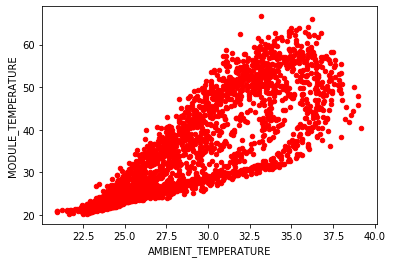

In [53]:
plant2.plot(kind='scatter',x='AMBIENT_TEMPERATURE',y='MODULE_TEMPERATURE',color='red')

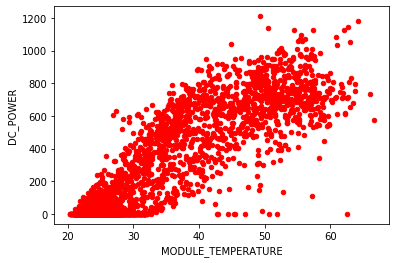

In [54]:
plant2.plot(kind='scatter',x='MODULE_TEMPERATURE',y='DC_POWER',color='red')

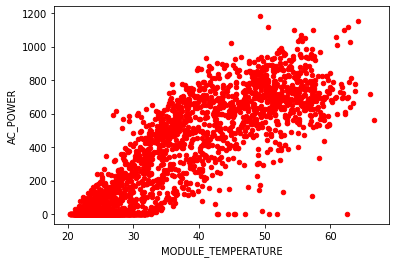

In [55]:
plant2.plot(kind='scatter',x='MODULE_TEMPERATURE',y='AC_POWER',color='red')

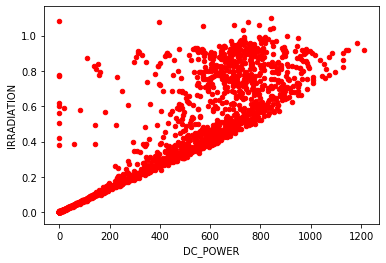

In [56]:
plant2.plot(kind='scatter',x='DC_POWER',y='IRRADIATION',color='red')

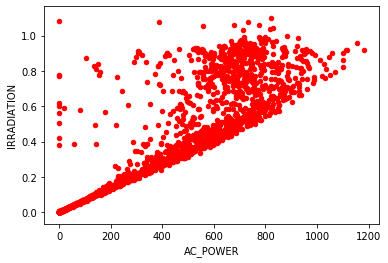

In [57]:
plant2.plot(kind='scatter',x='AC_POWER',y='IRRADIATION',color='red')

In [58]:
### Plant 2 has a weaker correlation between ambient temperature and module temperature ; module temperature and dc power ;

In [59]:
### module temperature and ac power ; dc power and irradiation ; ac power and irradiation.

In [60]:
### The conclusions that we can derive from these plots are that the Ambient temperature raises the Module temperature
### which in turn affects the DC and AC power generated by the solar power generator, the increase in DC and AC power
### being generated means an increase in Irradiation

In [61]:
### Now that we have formed our hypothesis, we can create a linear regression model and train it using our Plant2 Data
### in order to predict DC and AC power generation, and irradiation levels which identify the need for panel
### cleaning/maintenance. If the DC or AC power generation does not fit our trained model then we can identify
### faulty or suboptimally performing equipment.

In [62]:
### First we will train a model on the ambient temperature in order to predict dc power.
### We will run two iterations: 1) We use plant 1 as training data and plant 2 as test 2) vice versa.
### My hypothesis is that we will obtain better results by using plant 2 as training data since there are
### more abnormalities in plant 2's data than plant 1 hence the model will have much less variance with
### the tradeoff of slight higher bias

In [63]:
X_train, y_train = plant1[['AMBIENT_TEMPERATURE']], plant1['DC_POWER']

## Let's start off with a basic linear regression model

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
linear_model = LinearRegression()

In [67]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [68]:
X_test, y_test = plant2[['AMBIENT_TEMPERATURE']], plant2['DC_POWER']

In [69]:
y_pred = linear_model.predict(X_test)

In [70]:
y_pred

array([4383.15382204, 4276.77875188, 4106.20750356, ..., 1250.72823205,
       1196.06613157, 1120.39270787])

In [71]:
### Now that we have our predictions from our basic linear regression model let's use the Mean Absolute Error

In [72]:
### to see how well our model did

## Error Analysis

In [73]:
from sklearn.metrics import mean_absolute_error

In [74]:
mean_absolute_error(y_test, y_pred)

5050.507295322665

In [75]:
### Let's compare with a DecisionTreeRegressor and XGBoostRegressor

## Let's Decision Tree Regressor

In [76]:
from sklearn.tree import DecisionTreeRegressor

In [77]:
decisiontree_model = DecisionTreeRegressor()

In [78]:
decisiontree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [79]:
y_pred = decisiontree_model.predict(X_test)

In [80]:
mean_absolute_error(y_test, y_pred)

4423.280626768332

## Let's XGBoost Regressor

In [81]:
from xgboost import XGBRegressor

In [82]:
xgboost_model = XGBRegressor()

In [83]:
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
y_pred = xgboost_model.predict(X_test)

In [85]:
mean_absolute_error(y_test, y_pred)

4364.144701131557

In [86]:
### The DecisionTreeRegressor and XGBoostRegressor are both close. Now let us swap the training and test data
### and compare results.

In [87]:
X_train, y_train = plant2[['AMBIENT_TEMPERATURE']], plant2['DC_POWER']

In [88]:
X_test, y_test = plant1[['AMBIENT_TEMPERATURE']], plant1['DC_POWER']

In [89]:
xgboost_model = XGBRegressor()

In [90]:
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [91]:
y_pred = xgboost_model.predict(X_test)

In [92]:
mean_absolute_error(y_test, y_pred)

3005.766709281277

In [93]:
decisiontree_model = DecisionTreeRegressor()

In [94]:
decisiontree_model.fit(X_train, y_train)

DecisionTreeRegressor()

## Predict Model 

In [95]:
y_pred = decisiontree_model.predict(X_test) 

In [96]:
mean_absolute_error(y_test, y_pred)

3003.396221104327

In [97]:
### Notice the drastic performance increase on both models when we opt to using the more variable data of plant 2 compared
### to that of plant 1.

In [98]:
### So now we can successfully predict the dc power based on ambient temperature for plant 1 or 2. We will not predict
### the ac power for brevity, note that it is the exact same process but replacing 'DC_POWER' with 'AC_POWER'

In [99]:
### Now we can predict irradiation levels which identifies the need for panel cleaning/maintenance.

In [100]:
X_train, y_train = plant2[['AMBIENT_TEMPERATURE']], plant2['IRRADIATION']

In [101]:
X_test, y_test = plant1[['AMBIENT_TEMPERATURE']], plant1['IRRADIATION']

In [102]:
decisiontree_model = DecisionTreeRegressor()

In [103]:
decisiontree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [104]:
y_pred = decisiontree_model.predict(X_test)

In [105]:
mean_absolute_error(y_test, y_pred)

0.17490564545257953

In [106]:
xgboost_model = XGBRegressor()

In [107]:
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Predict Model 

In [108]:
y_pred = xgboost_model.predict(X_test)

In [109]:
mean_absolute_error(y_test, y_pred)

0.1541048447831368

## Generate Pickle For Deploy

In [112]:
import pickle
pickle.dump(decisiontree_model,open('model_solar_generation.pkl','wb'))

In [113]:
model = pickle.load(open('model_solar_radiation.pkl','rb'))

In [110]:
### In this case, the XGBoostRegressor performs better than the DecisionTreeRegressor. We are successfully able
### to identify the need for panel cleaning/maintenance by predicting the irradiation based on ambient temperature. 